# Import the Libraries

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime
from datetime import datetime
import inflection
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from sklearn.impute import KNNImputer
import statsmodels.api as sm
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen 
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15.7,6.27)})

# Load the dataset

In [2]:
df_sales_raw=pd.read_csv('train.csv')
df_store_raw=pd.read_csv('store.csv')
#Load the dataset

In [3]:
# Let's merge the dataset
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store' )
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Data preparation & understanding

In [4]:
#Copy dataset
df_new = df_raw.copy()
df_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
#Let raname the columns
old_columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

new_columns = list( map( snakecase, old_columns ) )


#Rename Columns
df_new.columns = new_columns

In [6]:
df_new.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In [7]:
#Let's check the shape of dataset
df_new.shape

(1017209, 18)

In [8]:
df_new[df_new['store']==46].head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
45,46,5,2015-07-31,7628,775,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1160,46,4,2015-07-30,7057,760,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2275,46,3,2015-07-29,6955,716,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3390,46,2,2015-07-28,6385,714,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4505,46,1,2015-07-27,10068,896,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [9]:
#Store_46
df_new_store46=df_new[df_new['store']==46]

In [10]:
df_new_store46.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
45,46,5,2015-07-31,7628,775,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1160,46,4,2015-07-30,7057,760,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2275,46,3,2015-07-29,6955,716,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3390,46,2,2015-07-28,6385,714,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4505,46,1,2015-07-27,10068,896,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [11]:
#transform datatype of the variable data to datetime
df_new_store46['date'] = pd.to_datetime(df_new_store46['date'])

In [12]:
df_new_store46.info()
#Let's check the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 45 to 1016140
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   store                         758 non-null    int64         
 1   day_of_week                   758 non-null    int64         
 2   date                          758 non-null    datetime64[ns]
 3   sales                         758 non-null    int64         
 4   customers                     758 non-null    int64         
 5   open                          758 non-null    int64         
 6   promo                         758 non-null    int64         
 7   state_holiday                 758 non-null    object        
 8   school_holiday                758 non-null    int64         
 9   store_type                    758 non-null    object        
 10  assortment                    758 non-null    object        
 11  competition_distance       

In [13]:
# Check NAN values
missing_count = df_new_store46.isnull().sum() # the count of missing values
value_count = df_new_store46.isnull().count() # the count of all values

missing_percentage = round(missing_count/value_count *100, 2) # the percentage of missing values
missing_df = pd.DataFrame({'missing values count': missing_count, 'percentage': missing_percentage})
missing_df

,missing values count,percentage
store,0,0.0
day_of_week,0,0.0
date,0,0.0
sales,0,0.0
customers,0,0.0
open,0,0.0
promo,0,0.0
state_holiday,0,0.0
school_holiday,0,0.0
store_type,0,0.0


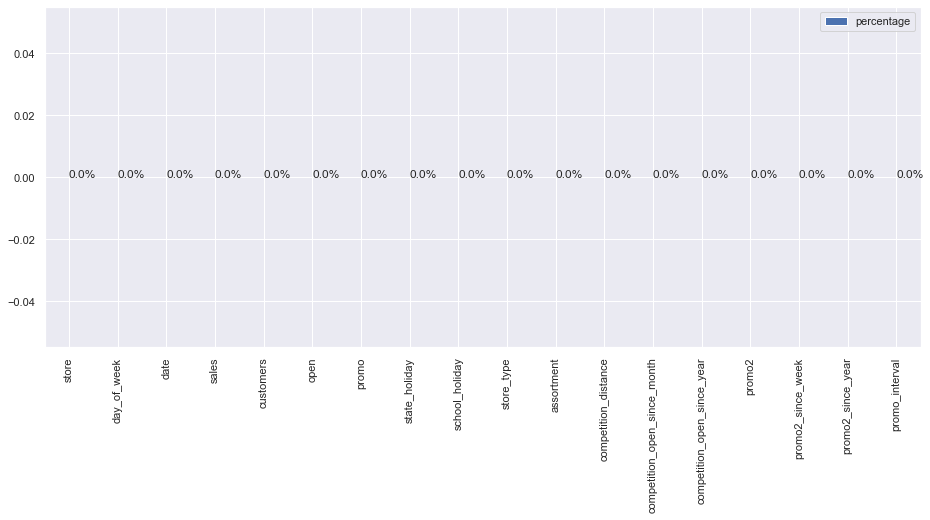

In [14]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate( missing_percentage ):
    barchart.text( index, percentage, str(percentage)+'%')

In [15]:
df_new_store46.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
45,46,5,2015-07-31,7628,775,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1160,46,4,2015-07-30,7057,760,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2275,46,3,2015-07-29,6955,716,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3390,46,2,2015-07-28,6385,714,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4505,46,1,2015-07-27,10068,896,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [16]:
df_new_store46.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 45 to 1016140
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   store                         758 non-null    int64         
 1   day_of_week                   758 non-null    int64         
 2   date                          758 non-null    datetime64[ns]
 3   sales                         758 non-null    int64         
 4   customers                     758 non-null    int64         
 5   open                          758 non-null    int64         
 6   promo                         758 non-null    int64         
 7   state_holiday                 758 non-null    object        
 8   school_holiday                758 non-null    int64         
 9   store_type                    758 non-null    object        
 10  assortment                    758 non-null    object        
 11  competition_distance       

In [17]:
# Let's copy the dataset
df_store46 = df_new_store46.copy()

In [18]:
df_store46.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
45,46,5,2015-07-31,7628,775,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1160,46,4,2015-07-30,7057,760,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2275,46,3,2015-07-29,6955,716,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3390,46,2,2015-07-28,6385,714,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4505,46,1,2015-07-27,10068,896,1,1,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


**Descriptive Statistics**

In [19]:
df_store46.describe().T

,count,mean,std,min,25%,50%,75%,max
store,758.0,46.000000,0.000000,46.0,46.00,46.0,46.0,46.0
day_of_week,758.0,4.001319,1.999009,1.0,2.00,4.0,6.0,7.0
sales,758.0,4391.985488,2503.576765,0.0,3525.25,4657.5,5996.0,12250.0
customers,758.0,541.994723,275.786887,0.0,512.00,620.5,711.0,1092.0
open,758.0,0.820580,0.383957,0.0,1.00,1.0,1.0,1.0
promo,758.0,0.377309,0.485033,0.0,0.00,0.0,1.0,1.0
school_holiday,758.0,0.163588,0.370146,0.0,0.00,0.0,0.0,1.0
competition_distance,758.0,1200.000000,0.000000,1200.0,1200.00,1200.0,1200.0,1200.0
competition_open_since_month,758.0,9.000000,0.000000,9.0,9.00,9.0,9.0,9.0
competition_open_since_year,758.0,2005.000000,0.000000,2005.0,2005.00,2005.0,2005.0,2005.0


In [20]:
# separate numerical and categorical attributes
num_attributes = df_store46.select_dtypes( include = 'number')
cate_attributes = df_store46.select_dtypes( include = 'object')

**Numerical Attributes**

In [21]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtoisis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()


m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,46.0,46.0,0.0,46.000000,46.0,0.000000,0.000000,0.000000
1,day_of_week,1.0,7.0,6.0,4.001319,4.0,1.997690,-0.001819,-1.246747
2,sales,0.0,12250.0,12250.0,4391.985488,4657.5,2501.924784,-0.353074,-0.167786
3,customers,0.0,1092.0,1092.0,541.994723,620.5,275.604909,-1.059088,0.063006
4,open,0.0,1.0,1.0,0.820580,1.0,0.383703,-1.674297,0.805387
5,promo,0.0,1.0,1.0,0.377309,0.0,0.484713,0.507247,-1.747318
6,school_holiday,0.0,1.0,1.0,0.163588,0.0,0.369902,1.822533,1.325117
7,competition_distance,1200.0,1200.0,0.0,1200.000000,1200.0,0.000000,0.000000,0.000000
8,competition_open_since_month,9.0,9.0,0.0,9.000000,9.0,0.000000,0.000000,0.000000
9,competition_open_since_year,2005.0,2005.0,0.0,2005.000000,2005.0,0.000000,0.000000,0.000000


**Categorical Attributes**


In [22]:
# check unique values of categorical features
cate_attributes.apply( lambda x: x.unique().shape[0])

state_holiday     5
store_type        1
assortment        1
promo_interval    1
dtype: int64

In [23]:
#Let's check the unique values
print(df_store46['state_holiday'].unique())
print(df_store46['store_type'].unique())
print(df_store46['assortment'].unique())
print(df_store46['promo_interval'].unique())

['0' 'a' 'b' 0 'c']
['c']
['a']
['Jan,Apr,Jul,Oct']


In [24]:
df_store46.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# Exploratory data analysis(EDA)

Let’s perform EDA to gain insights into the given data.

**Univariate Analysis**

Response Variable (target)

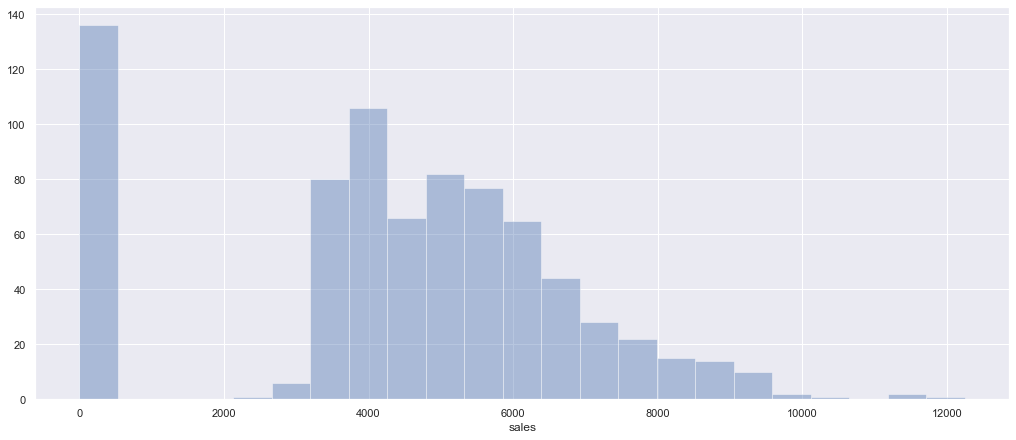

In [25]:
fig = plt.figure( figsize = (14, 6), constrained_layout=True)
sns.distplot(df_store46['sales'], kde = False);
plt.show()

**Numerical Variable**

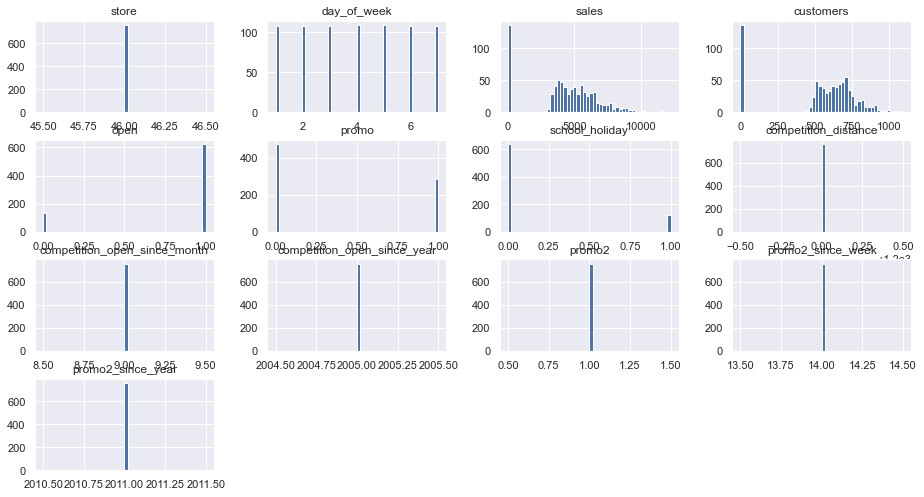

In [26]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
num_attributes.hist(bins = 50);

In [27]:
df_store46['day_of_week'].value_counts()
#day of the week

5    109
4    109
7    108
6    108
3    108
2    108
1    108
Name: day_of_week, dtype: int64

In [28]:
df_store46['open'].value_counts()
# value count of store is open or not

1    622
0    136
Name: open, dtype: int64

In [29]:
df_store46['school_holiday'].value_counts()
# value count of state_holiday

0    634
1    124
Name: school_holiday, dtype: int64

In [30]:
df_store46['store_type'].value_counts()
# value count of Store_type

c    758
Name: store_type, dtype: int64

In [31]:
df_store46['assortment'].value_counts()
# value count of assortment

a    758
Name: assortment, dtype: int64

In [32]:
df_store46['competition_distance'].value_counts()
# value count of competition distance

1200.0    758
Name: competition_distance, dtype: int64

In [33]:
df_store46['competition_open_since_month'].value_counts()
# value count of competition_open_since_month

9.0    758
Name: competition_open_since_month, dtype: int64

In [34]:
df_store46['competition_open_since_year'].value_counts()
# value count of competition open since year

2005.0    758
Name: competition_open_since_year, dtype: int64

In [35]:
df_store46['promo2'].value_counts()
# value count of promo2

1    758
Name: promo2, dtype: int64

In [36]:
df_store46['promo2_since_week'].value_counts()
# value count of promo2_since_week

14.0    758
Name: promo2_since_week, dtype: int64

In [37]:
df_store46['promo2_since_year'].value_counts()
# value count of promo2_since_year

2011.0    758
Name: promo2_since_year, dtype: int64

In [38]:
df_store46['promo_interval'].value_counts()
# value count of promo_interval

Jan,Apr,Jul,Oct    758
Name: promo_interval, dtype: int64

In [39]:
df_store46.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

**Categorical Variable**

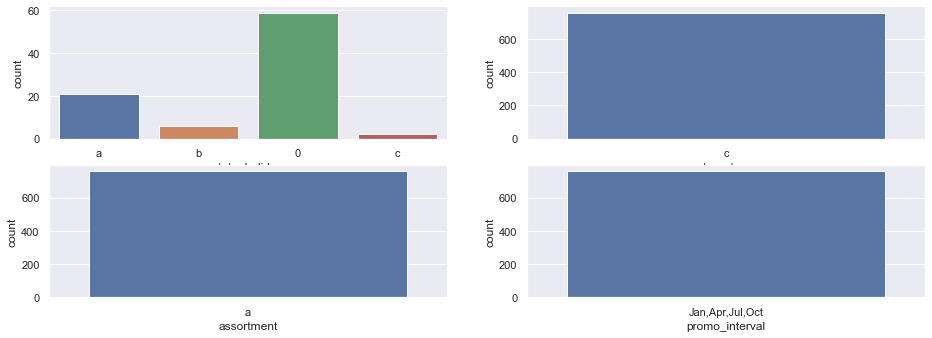

In [40]:
# state_holiday
plt.subplot(3, 2, 1)
a = df_store46[df_store46['state_holiday'] != '0']
sns.countplot(data = a, x = a['state_holiday'])

# store_type
plt.subplot(3, 2, 2)
sns.countplot(data = df_store46, x = df_store46['store_type'])

# assortment
plt.subplot(3, 2, 3)
sns.countplot(data = df_store46, x = df_store46['assortment'])

#promo_interval
plt.subplot(3, 2, 4)
sns.countplot(data = df_store46, x = df_store46['promo_interval'])
plt.show()

In [41]:
# Zero values in sales 
df_store46[df_store46['sales']==0]

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
5620,46,7,2015-07-26,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
13425,46,7,2015-07-19,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
21230,46,7,2015-07-12,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
29035,46,7,2015-07-05,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
36840,46,7,2015-06-28,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987150,46,7,2013-01-27,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
994955,46,7,2013-01-20,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1002760,46,7,2013-01-13,0,0,0,0,0,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1010565,46,7,2013-01-06,0,0,0,0,a,0,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [42]:
df_store46.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 45 to 1016140
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   store                         758 non-null    int64         
 1   day_of_week                   758 non-null    int64         
 2   date                          758 non-null    datetime64[ns]
 3   sales                         758 non-null    int64         
 4   customers                     758 non-null    int64         
 5   open                          758 non-null    int64         
 6   promo                         758 non-null    int64         
 7   state_holiday                 758 non-null    object        
 8   school_holiday                758 non-null    int64         
 9   store_type                    758 non-null    object        
 10  assortment                    758 non-null    object        
 11  competition_distance       


-    Sale  and customer colomns has zero values which has to be imputed

-    Store is open on 80% of days

-    80% are regular days

-    All the rows of column-store type belongs to 'c'

-    All the rows of column-assortment belongs to 'a'

-    All the rows of columns-competition_distance to 1200

-    All the rows of promo2 belogs to 1

**Bivariate Analysis**

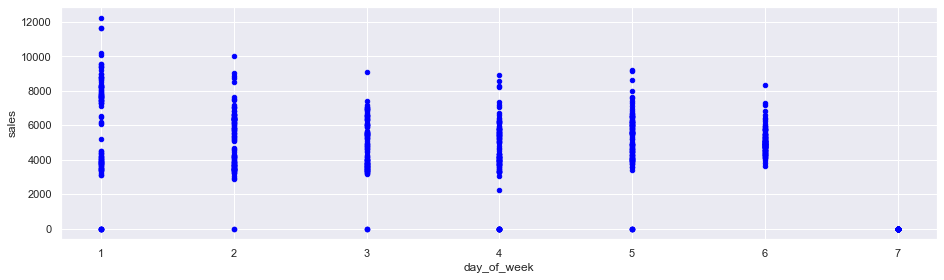

In [43]:
#Let's draw a scatter plot between Sales and day_of_week
sns.set(rc={'figure.figsize':(15.7,4.27)})
df_store46[['sales', 'day_of_week']].plot.scatter(x = 'day_of_week',y='sales',c='blue')
plt.show()

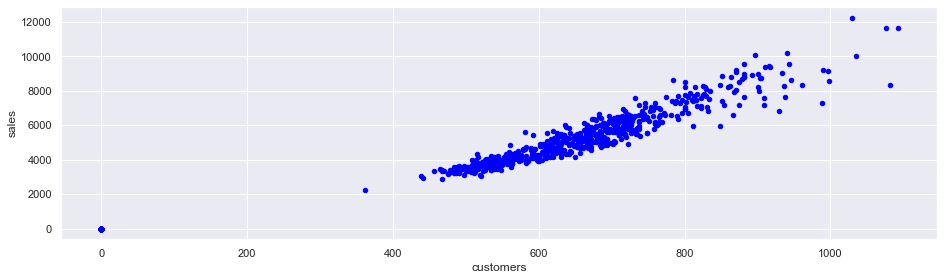

In [44]:
#Let's draw a scatter plot between Sales and Customers
df_store46[['sales', 'customers']].plot.scatter(x = 'customers',y='sales',c='blue')
plt.show()

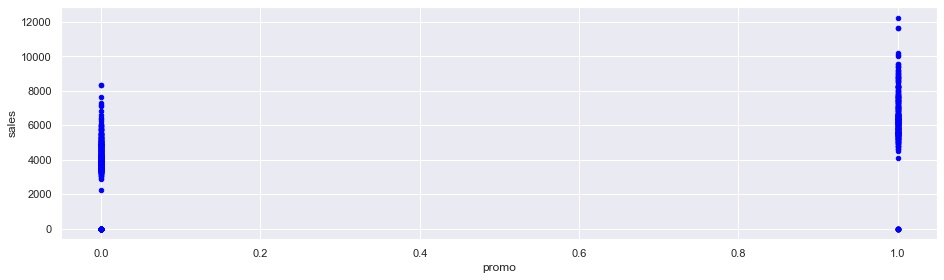

In [45]:
#Let's draw a scatter plot between Sales and promo
df_store46[['sales', 'promo']].plot.scatter(x = 'promo',y='sales',c='blue')
plt.show()

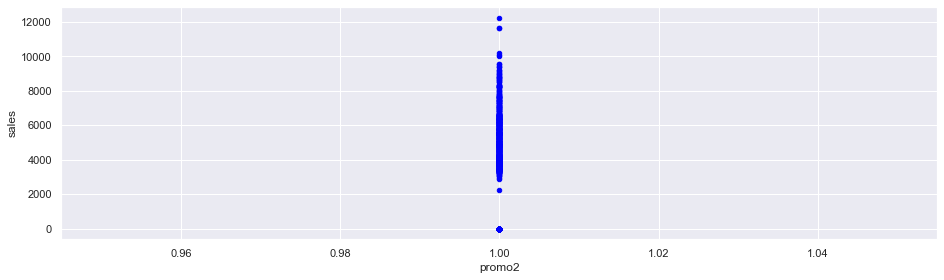

In [46]:
#Let's now draw a scatter plot between Sales and promo
df_store46[['sales', 'promo2']].plot.scatter(x = 'promo2',y='sales',c='blue')
plt.show()

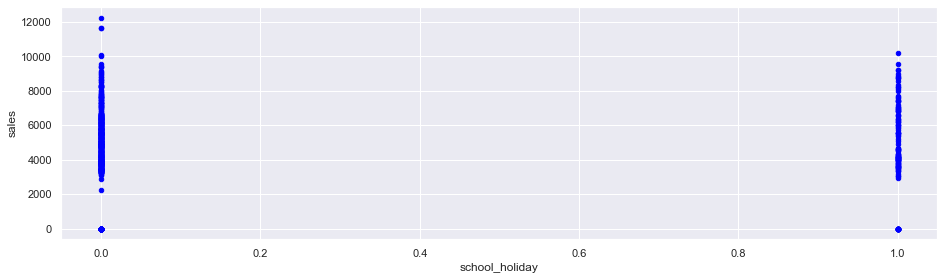

In [47]:
#lets now draw a scatter plot between  Sales and school_holiday
df_store46[['sales', 'school_holiday']].plot.scatter(x = 'school_holiday',y='sales',c='blue')
plt.show()

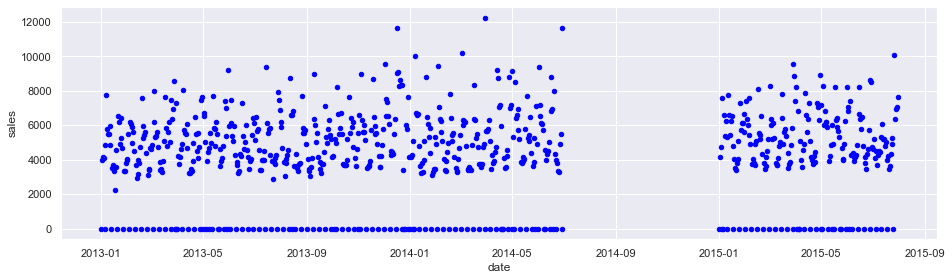

In [48]:
#lets now draw a scatter plot between Sales and date
df_store46[['sales', 'date']].plot.scatter(x = 'date',y='sales',c='blue')
plt.show()

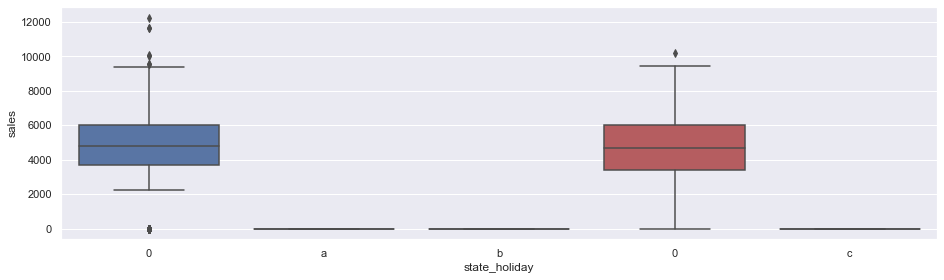

In [49]:
#Let's draw the boxplot between sales and state_holiday
sns.set(rc={'figure.figsize':(15.7,4.27)})
# create grouped boxplot 
sns.boxplot(x = df_store46['state_holiday'],
            y = df_store46['sales'])
plt.show()

**Multivariate Analysis**

**Numerical Attributes**

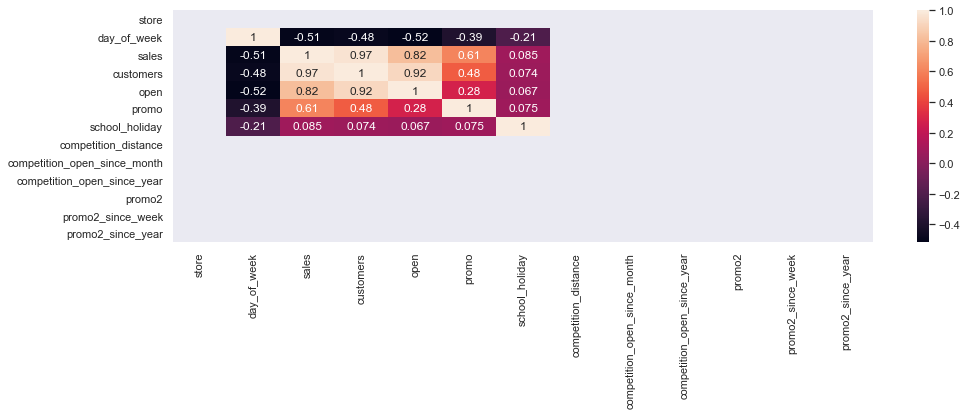

In [50]:
correlation = (num_attributes.corr( method = 'pearson' ))
sns.heatmap( correlation, annot = True );

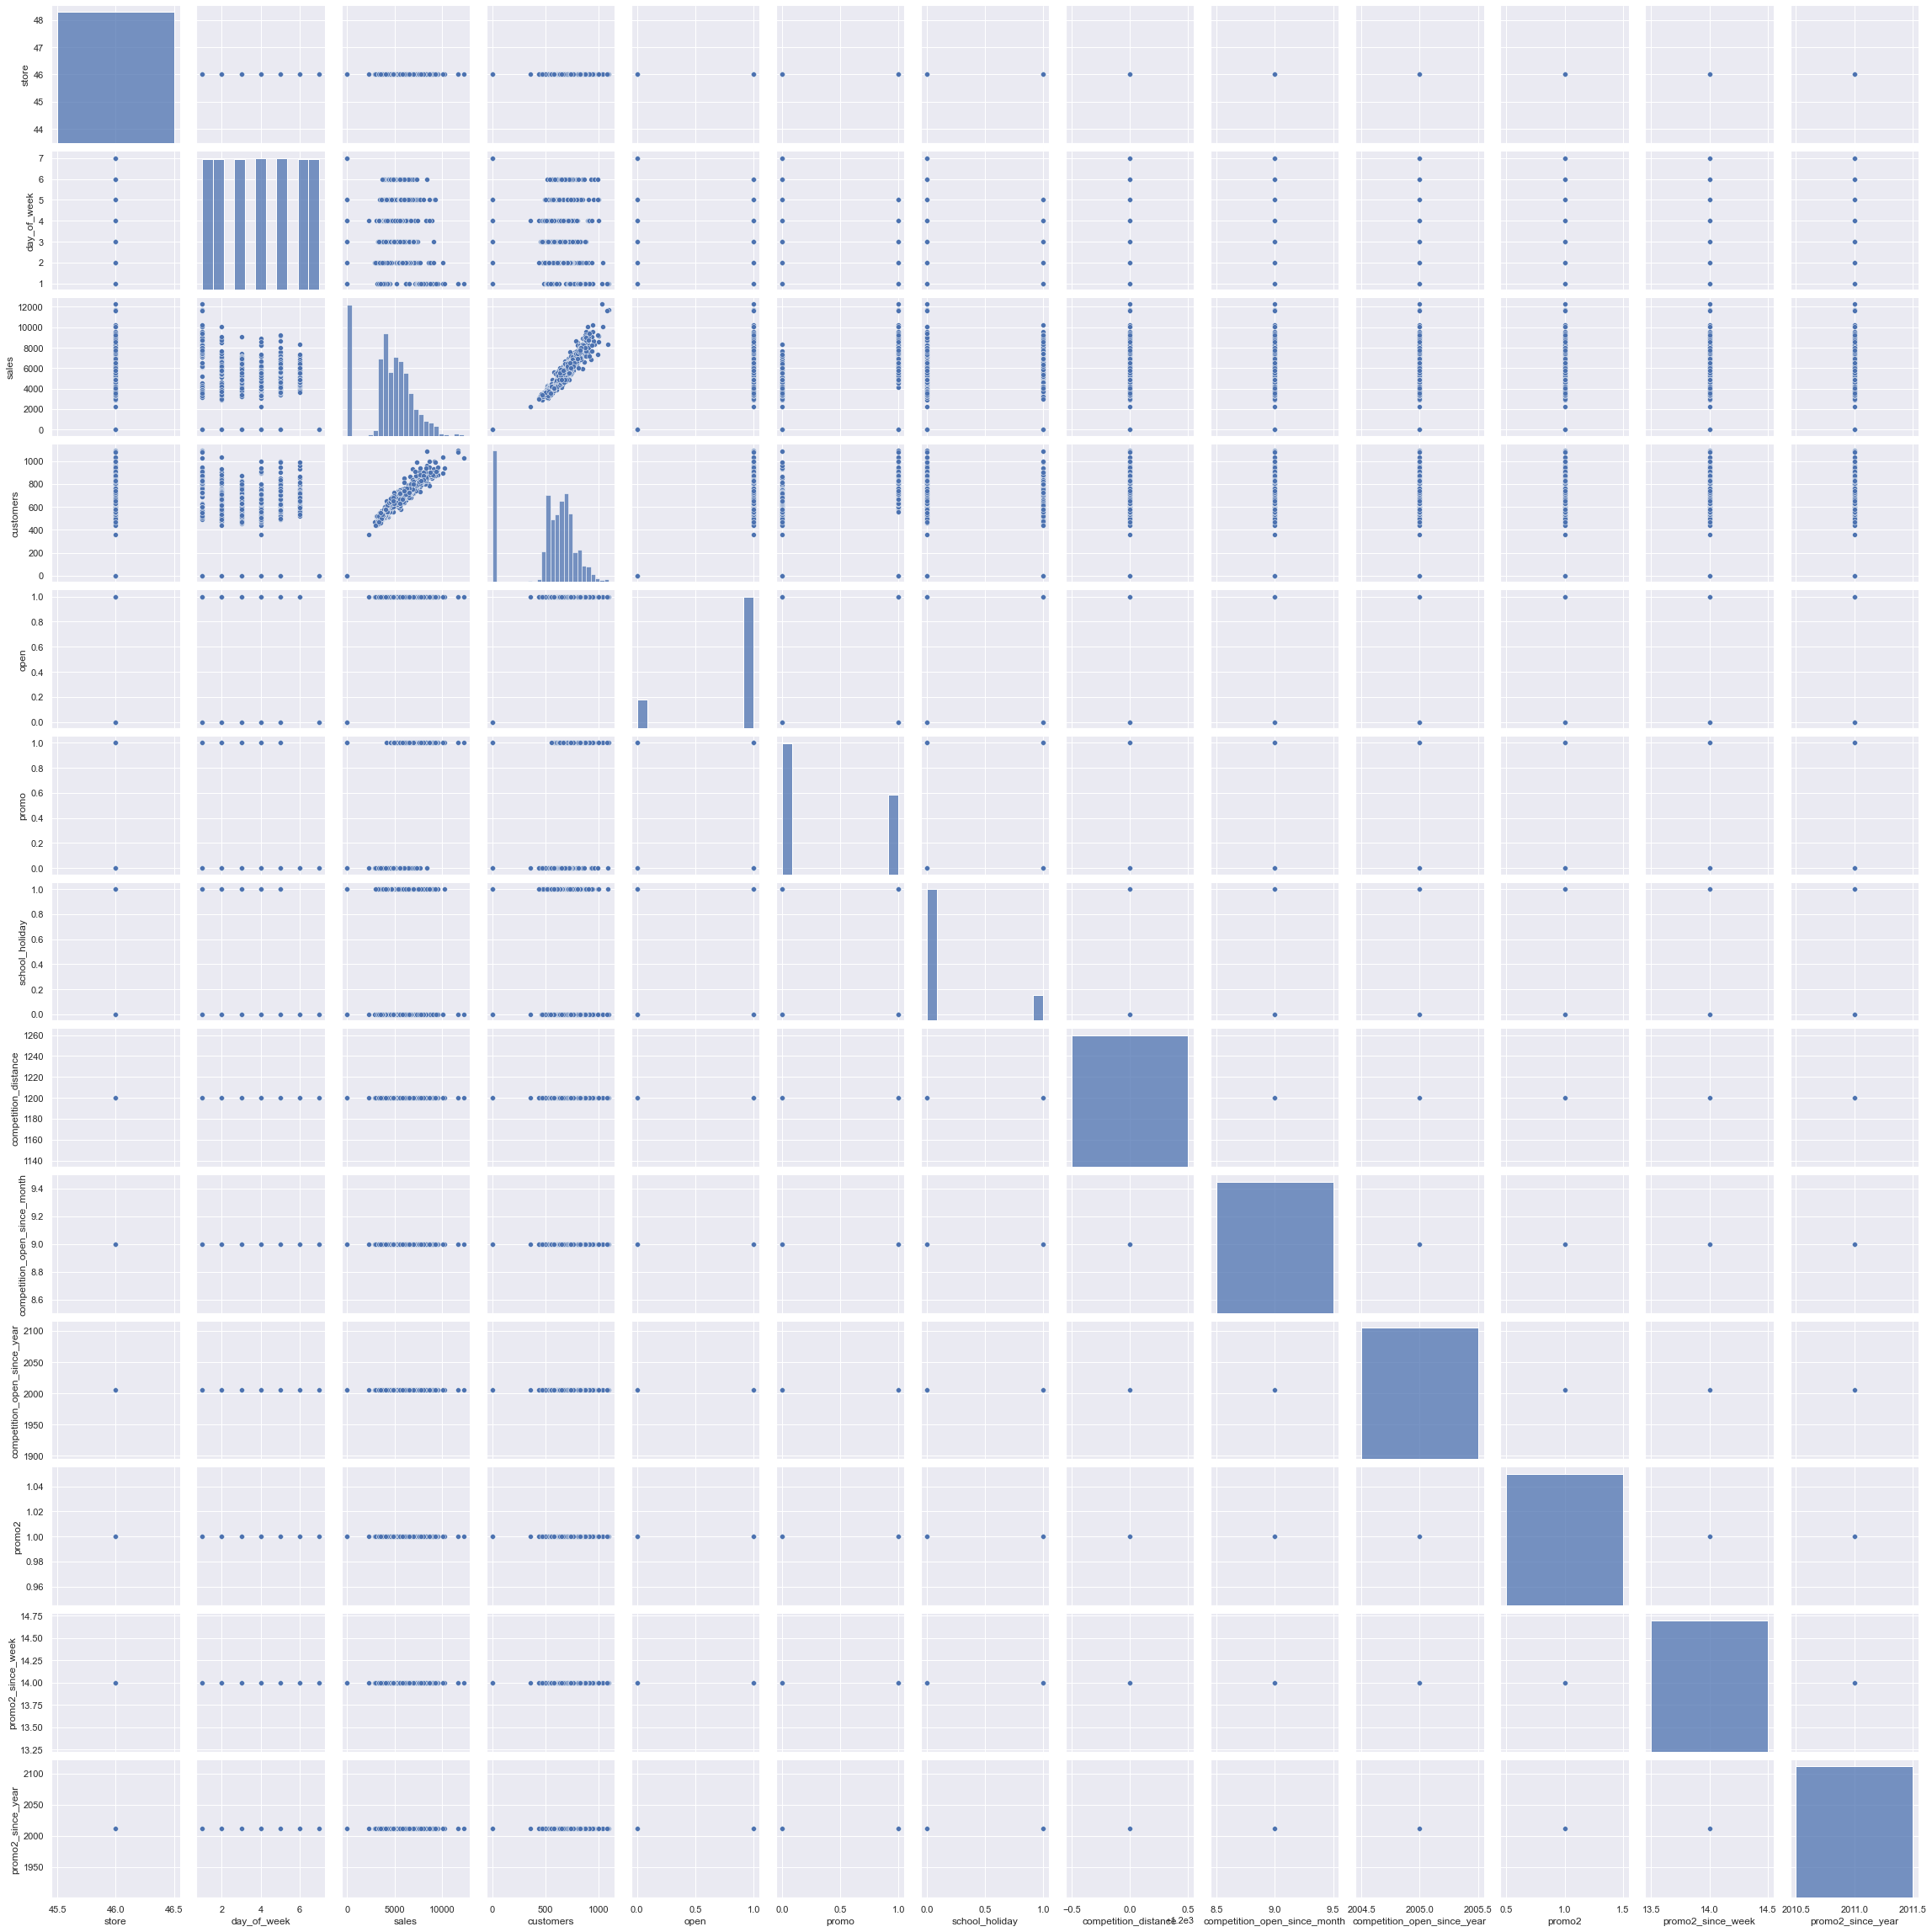

In [51]:
#pairplot with hue sales
sns.pairplot(df_store46)
# to show
plt.show()

**Some insights from EDA**

   - store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year and promo_interval are uncessary columns becuase it doesn't have any effect on sales(target variable)

   - Day1 and Day2 have higher sales than other days

   - promo is correlated to sales

   - Promo2 doesn't have any effect on sales becuase it's value is equal to 1

   - There is no sale on a = public holiday, b = Easter holiday, c = Christmas

   - There is some effect of school holiday on sales

In [52]:
df_store46.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In [53]:
#We can drop store_type,assortment,competition_distance,competition_open_since_month,promo2_since_week,promo2_since_year,promo_interval
#competition_open_since_year & promo2
df_store46_new=df_store46.drop(['store_type', 'assortment','competition_distance','competition_open_since_month','competition_open_since_year','promo2_since_week','promo2_since_year','promo_interval'], axis = 1)
df_store46_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 45 to 1016140
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   store           758 non-null    int64         
 1   day_of_week     758 non-null    int64         
 2   date            758 non-null    datetime64[ns]
 3   sales           758 non-null    int64         
 4   customers       758 non-null    int64         
 5   open            758 non-null    int64         
 6   promo           758 non-null    int64         
 7   state_holiday   758 non-null    object        
 8   school_holiday  758 non-null    int64         
 9   promo2          758 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 85.1+ KB


In [54]:
df_store46_new.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'promo2'],
      dtype='object')

In [55]:
df_store46_new.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,promo2
45,46,5,2015-07-31,7628,775,1,1,0,0,1
1160,46,4,2015-07-30,7057,760,1,1,0,0,1
2275,46,3,2015-07-29,6955,716,1,1,0,0,1
3390,46,2,2015-07-28,6385,714,1,1,0,0,1
4505,46,1,2015-07-27,10068,896,1,1,0,0,1


In [ ]:
# saving the dataframe
#df_store46_new.to_csv('cleaned_df_store46.csv')

# **Model Building**

**ARIMA model**

In [56]:
path = "cleaned_df_store46.csv"
df_store46_new = pd.read_csv(path)
df_store46_new.head()
#Let load the data

,Unnamed: 0,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,promo2
0,45,46,5,2015-07-31,7628,775,1,1,0,0,1
1,1160,46,4,2015-07-30,7057,760,1,1,0,0,1
2,2275,46,3,2015-07-29,6955,716,1,1,0,0,1
3,3390,46,2,2015-07-28,6385,714,1,1,0,0,1
4,4505,46,1,2015-07-27,10068,896,1,1,0,0,1


In [57]:
df_store46_new=df_store46_new[::-1].reset_index()
df_store46_new.head()

,index,Unnamed: 0,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,promo2
0,757,1016140,46,2,2013-01-01,0,0,0,0,a,1,1
1,756,1015025,46,3,2013-01-02,4016,582,1,0,0,1,1
2,755,1013910,46,4,2013-01-03,4177,553,1,0,0,1,1
3,754,1012795,46,5,2013-01-04,4125,569,1,0,0,1,1
4,753,1011680,46,6,2013-01-05,4848,651,1,0,0,0,1


In [58]:
df_store46_new=df_store46_new.drop(['Unnamed: 0'], axis = 1)
df_store46_new=df_store46_new.drop(['index'], axis = 1)
df_store46_new.head()
#Let drop the Unnamed: 0 column

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,promo2
0,46,2,2013-01-01,0,0,0,0,a,1,1
1,46,3,2013-01-02,4016,582,1,0,0,1,1
2,46,4,2013-01-03,4177,553,1,0,0,1,1
3,46,5,2013-01-04,4125,569,1,0,0,1,1
4,46,6,2013-01-05,4848,651,1,0,0,0,1


In [59]:
df_store46_new.info()
#No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   store           758 non-null    int64 
 1   day_of_week     758 non-null    int64 
 2   date            758 non-null    object
 3   sales           758 non-null    int64 
 4   customers       758 non-null    int64 
 5   open            758 non-null    int64 
 6   promo           758 non-null    int64 
 7   state_holiday   758 non-null    object
 8   school_holiday  758 non-null    int64 
 9   promo2          758 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 59.3+ KB


In [60]:
#transform datatype of the variable data to datetime
df_store46_new['date'] = pd.to_datetime(df_store46_new['date'])

In [61]:
indexed_df_store46_new = df_store46_new.set_index(['date'])
indexed_df_store46_new.head()
#Let's set the date as index column

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2
date,,,,,,,,,
2013-01-01,46,2,0,0,0,0,a,1,1
2013-01-02,46,3,4016,582,1,0,0,1,1
2013-01-03,46,4,4177,553,1,0,0,1,1
2013-01-04,46,5,4125,569,1,0,0,1,1
2013-01-05,46,6,4848,651,1,0,0,0,1


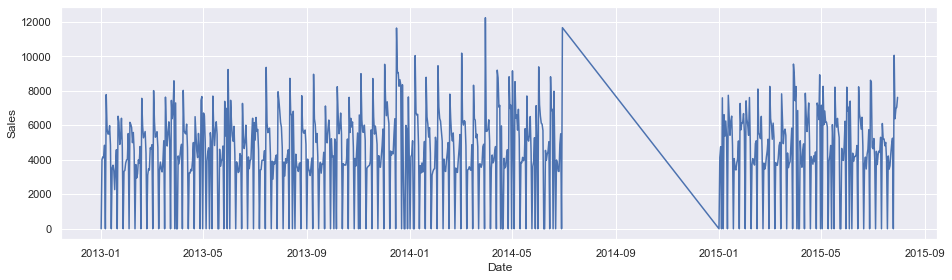

In [62]:
#plot graph
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexed_df_store46_new['sales'])
plt.show()

In [63]:
#Let impute the zero values
(indexed_df_store46_new['sales']==0).sum()
# There are 136 zero value in sale column

136

In [64]:
indexed_df_store46_new['sales']=indexed_df_store46_new['sales'].replace(0, np.nan)

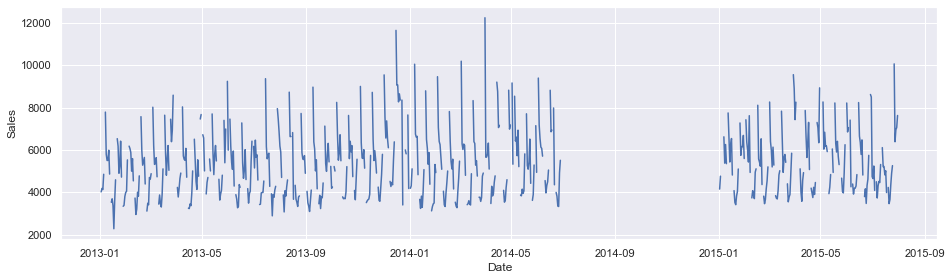

In [65]:
#plot graph
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexed_df_store46_new['sales'])
plt.show()

In [66]:
#KNN imputer for filling NAN values
imputer = KNNImputer(n_neighbors=2)

In [67]:
indexed_df_store46_new['sales'] = imputer.fit_transform(np.array(indexed_df_store46_new['sales']).reshape(-1, 1))
indexed_df_store46_new['sales'].head()

date
2013-01-01    5352.290997
2013-01-02    4016.000000
2013-01-03    4177.000000
2013-01-04    4125.000000
2013-01-05    4848.000000
Name: sales, dtype: float64

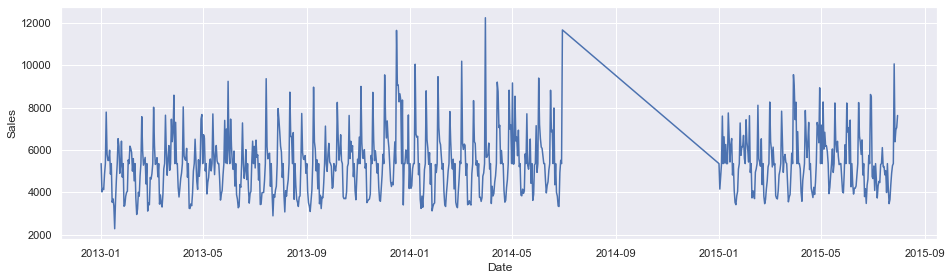

In [68]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexed_df_store46_new['sales'])
plt.show()

In [69]:
(indexed_df_store46_new['sales']==0).sum()
# no missing value

0

In [70]:
indexed_df_store46_new1=indexed_df_store46_new[:546]

In [71]:
indexed_df_store46_new1.tail()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2
date,,,,,,,,,
2014-06-26,46,4,3323.000000,488,1,0,0,0,1
2014-06-27,46,5,4918.000000,606,1,0,0,0,1
2014-06-28,46,6,5509.000000,712,1,0,0,0,1
2014-06-29,46,7,5352.290997,0,0,0,0,0,1
2014-06-30,46,1,11673.000000,1092,1,1,0,0,1



**6 Month data from 1/07/2014 to 31/12/2014 is missing so we can keep data till 30/06/2014 to make the model**

**Outlier detection**

Box plot and interquartile range

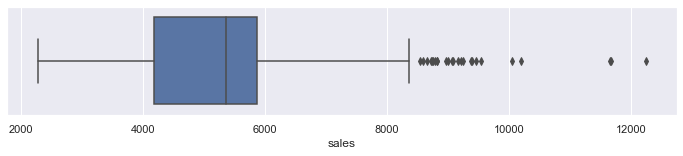

In [72]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=indexed_df_store46_new1['sales'],whis=1.5)
#Let treat the outliers

**Histogram**


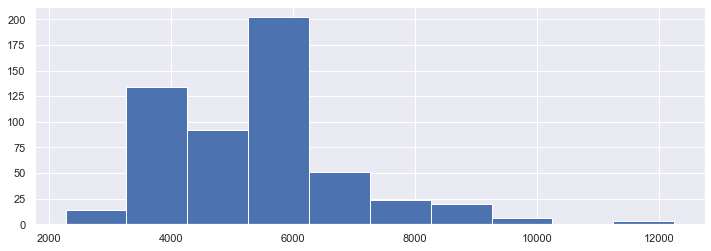

In [73]:
fig = indexed_df_store46_new1['sales'].hist(figsize = (12,4))

In [74]:
percentile01 = indexed_df_store46_new1['sales'].quantile(0.01)
percentile99 = indexed_df_store46_new1['sales'].quantile(0.99)

In [75]:
upper_limit = percentile99
lower_limit = percentile01

In [76]:
upper_limit

9508.749999999996

In [77]:
lower_limit

3111.5

In [78]:
#Let's keep the data till 99 percentile
new_df = indexed_df_store46_new1[indexed_df_store46_new1['sales'] < upper_limit]
new_df.shape

(540, 9)

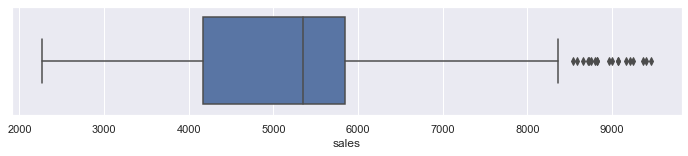

In [79]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=new_df['sales'],whis=1.5)

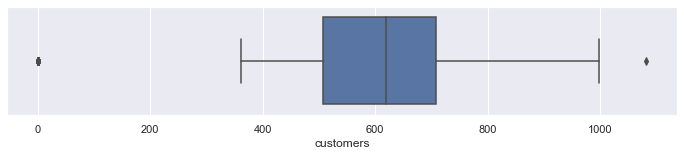

In [80]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=new_df['customers'],whis=1.5)

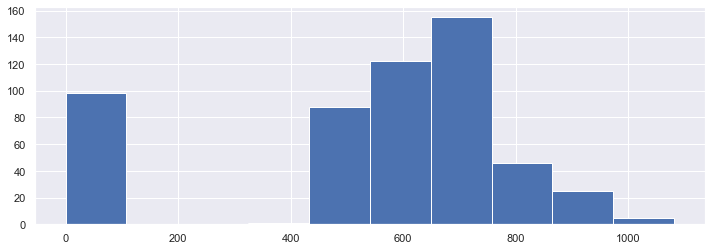

In [81]:
fig = new_df['customers'].hist(figsize = (12,4))

**ADF Stationary**

In [82]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexed_df_store46_new1['sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

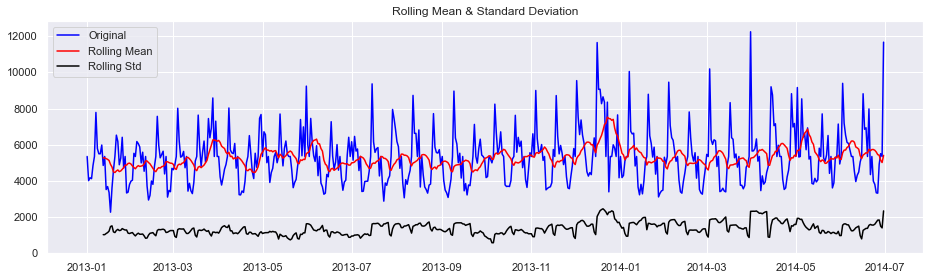

Results of Dickey Fuller Test:
Test Statistic                  -4.870578
p-value                          0.000040
#Lags Used                      15.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


In [83]:
#ADF test to check the stationary
test_stationarity(indexed_df_store46_new1['sales'])

- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

**The p-value is less than 0.05 so The series is stationary**

In [84]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(indexed_df_store46_new1['sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.483116
Critical Values @ 0.05: 0.46
p-value: 0.045469


- Null: Time Series is not stationary
- Alternate: Time Series is Stationary
    
**The p-value is less than 0.05 so The series is non-stationary**

# Let's take the log of sales to Standardize the sales values

In [85]:
new_df=indexed_df_store46_new1.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 546 entries, 2013-01-01 to 2014-06-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store           546 non-null    int64  
 1   day_of_week     546 non-null    int64  
 2   sales           546 non-null    float64
 3   customers       546 non-null    int64  
 4   open            546 non-null    int64  
 5   promo           546 non-null    int64  
 6   state_holiday   546 non-null    object 
 7   school_holiday  546 non-null    int64  
 8   promo2          546 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 42.7+ KB


**Log transformation has made mean & variance constant**

In [86]:
#Log Transformation
new_df['sales_log'] = np.log(new_df['sales'])
new_df.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log
date,,,,,,,,,,
2013-01-01,46,2,5352.290997,0,0,0,a,1,1,8.585280
2013-01-02,46,3,4016.000000,582,1,0,0,1,1,8.298042
2013-01-03,46,4,4177.000000,553,1,0,0,1,1,8.337349
2013-01-04,46,5,4125.000000,569,1,0,0,1,1,8.324821
2013-01-05,46,6,4848.000000,651,1,0,0,0,1,8.486322


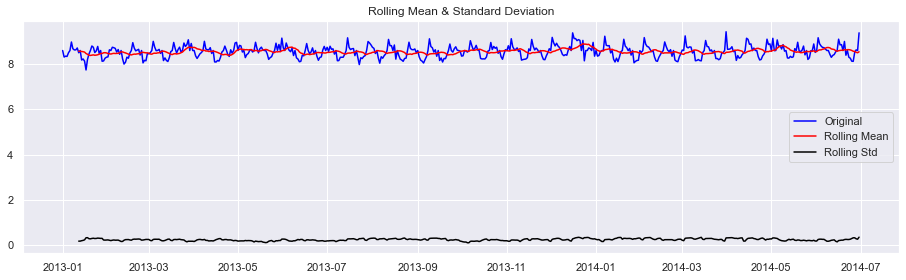

Results of Dickey Fuller Test:
Test Statistic                  -4.870578
p-value                          0.000040
#Lags Used                      15.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


In [87]:
test_stationarity(new_df['sales_log'])

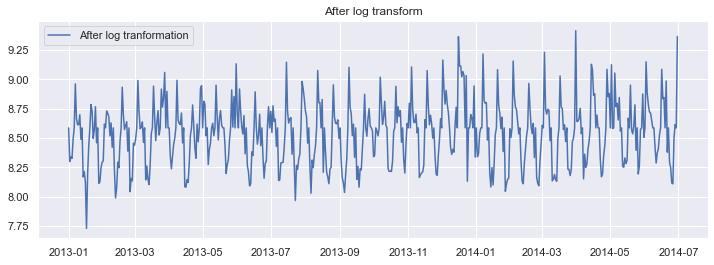

In [88]:
#After Log Transformation
plt.figure(figsize=(12,4))
plt.plot(new_df['sales_log'], label='After log tranformation')
plt.legend(loc='best')
plt.title('After log transform')
plt.show()

**Decomposition of time-series**

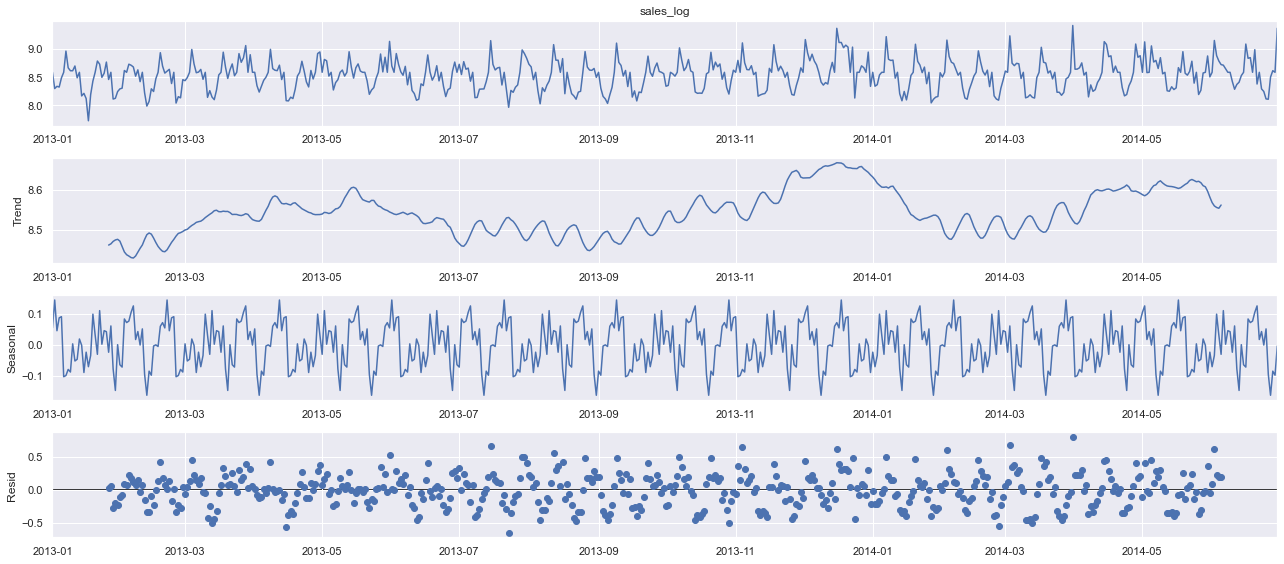

In [89]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(new_df['sales_log'], model = "additive",period=50)
fig = decomposition.plot()

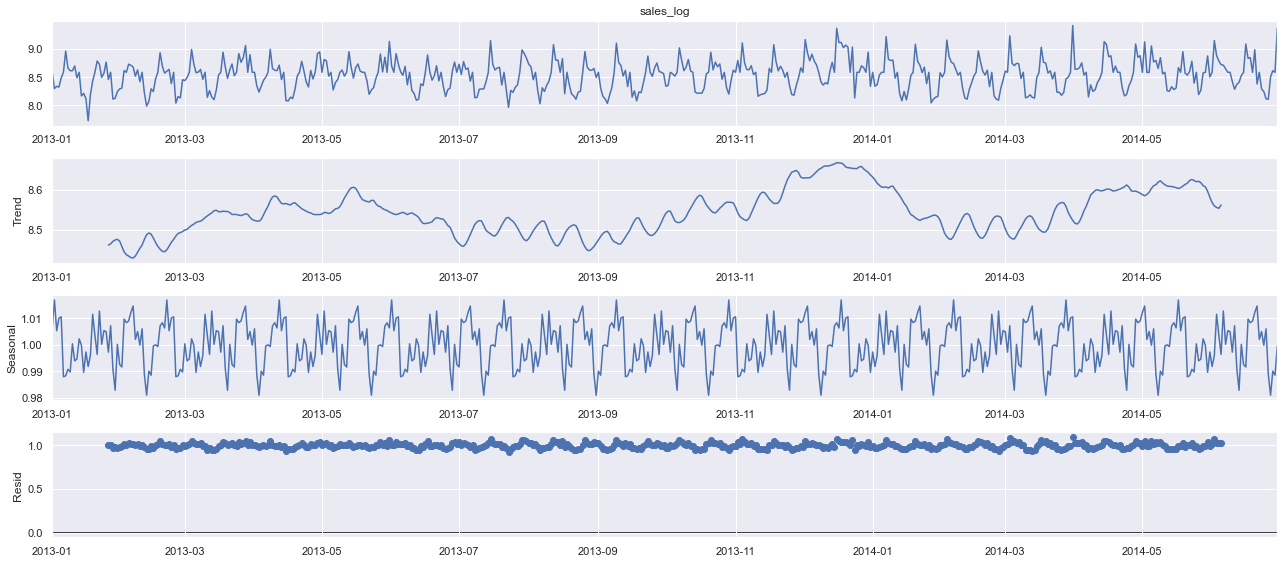

In [90]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(new_df['sales_log'], model = "multiplicative",period=50)
fig = decomposition.plot()

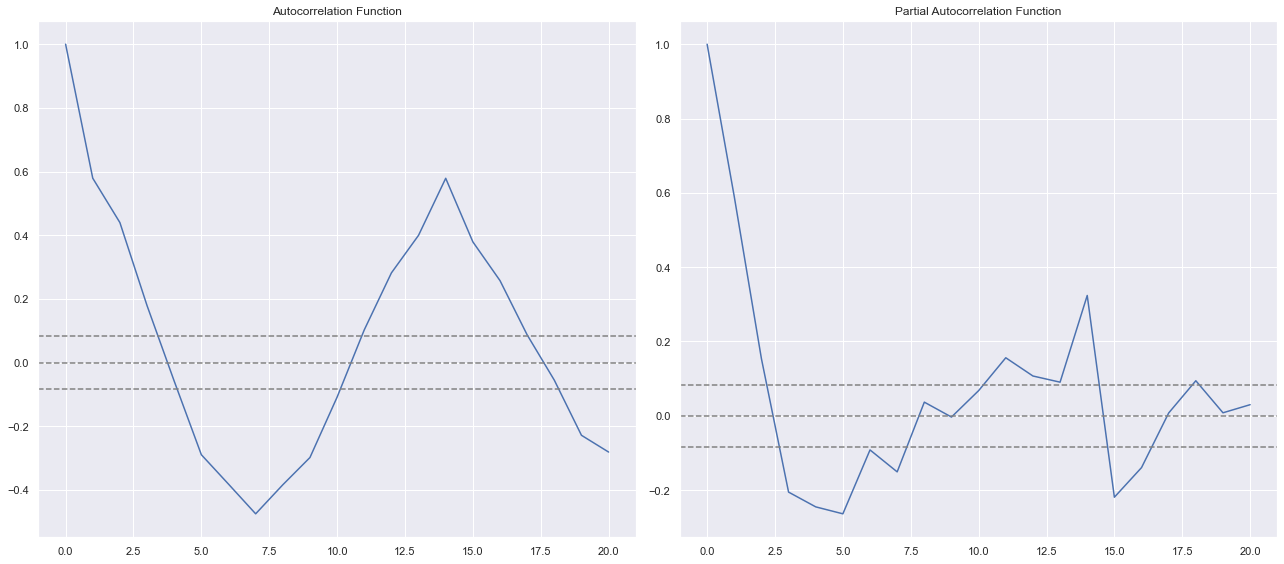

In [91]:
#ACF & PACF plots

lag_acf = acf(new_df['sales_log'], nlags=20) # MA 
lag_pacf = pacf(new_df['sales_log'], nlags=20, method='ols')  # AR 

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df['sales_log'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df['sales_log'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df['sales_log'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df['sales_log'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

From the ACF graph, we see that curve touches y=0.0 line at x=3. Thus, from theory, Q = 4 From the PACF graph, we see that curve touches y=0.0 line at x=3. Thus, from theory, P = 2


**Build and evaluate time series forecast**

Split time series data into training and test set


In [92]:
train_len = 446
train = new_df['sales'][0:train_len] # first 750days as training set
test = new_df['sales'][train_len:] # last 182 days as out-of-time test set

In [93]:
print(train.shape)
print(test.shape)

(446,)
(100,)


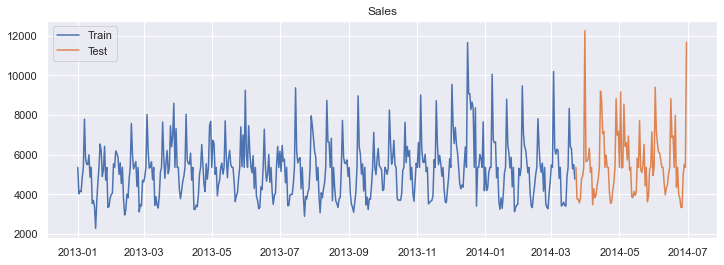

In [94]:
#Let's plot the graph
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.title('Sales')
plt.show()

In [95]:
#Arima Modelling
model = ARIMA(new_df['sales_log'], order=(2, 0, 4))
model_fit = model.fit()
print(model_fit.params)

const              8.543252
ar.L1.sales_log    1.761099
ar.L2.sales_log   -0.960988
ma.L1.sales_log   -1.434476
ma.L2.sales_log    0.745305
ma.L3.sales_log   -0.119551
ma.L4.sales_log    0.100905
dtype: float64


In [96]:
# Predictions
new_df['ar_forecast_Log'] = model_fit.predict(new_df.index.min(), new_df.index.max())
new_df['arima_forecast'] = np.exp(new_df['ar_forecast_Log'])
new_df['arima_forecast']

date
2013-01-01    5132.006597
2013-01-02    5262.036058
2013-01-03    4560.893112
2013-01-04    4270.034057
2013-01-05    4359.565976
                 ...     
2014-06-26    3898.505313
2014-06-27    4017.608612
2014-06-28    4856.280099
2014-06-29    5892.837498
2014-06-30    6253.272919
Name: arima_forecast, Length: 546, dtype: float64

In [97]:
new_df['ar_forecast_Log'] = model_fit.predict(new_df.index.min(), new_df.index.max())
new_df['arima_forecast'] = np.exp(new_df['ar_forecast_Log'])
new_df['arima_forecast']

date
2013-01-01    5132.006597
2013-01-02    5262.036058
2013-01-03    4560.893112
2013-01-04    4270.034057
2013-01-05    4359.565976
                 ...     
2014-06-26    3898.505313
2014-06-27    4017.608612
2014-06-28    4856.280099
2014-06-29    5892.837498
2014-06-30    6253.272919
Name: arima_forecast, Length: 546, dtype: float64

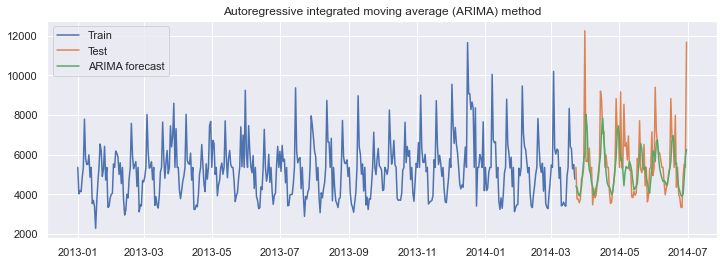

In [98]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(new_df['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

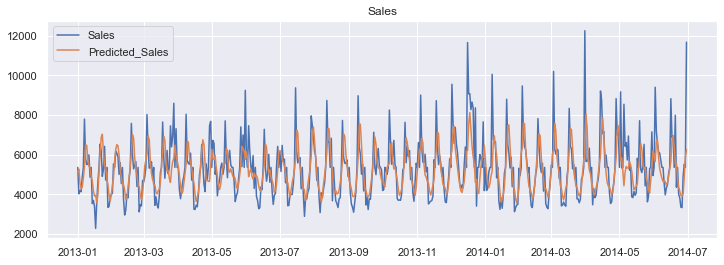

In [99]:
#plot the arima forecasting & Original series
plt.figure(figsize=(12,4))
plt.plot(new_df['sales'], label='Sales')
plt.plot(new_df['arima_forecast'], label='Predicted_Sales')
plt.legend(loc='best')
plt.title('Sales')
plt.show()

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [101]:
#Let's predict the sale after 6 weeks
from pandas.tseries.offsets import DateOffset
future_dates2=[new_df.index[-1]+DateOffset(days=x)for x in range(0,42)]
future_datest_df=pd.DataFrame(index=future_dates2[1:],columns=new_df.columns)

In [103]:
future_datest_df.tail()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast
2014-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
future_df=pd.concat([new_df,future_datest_df])
future_df.shape

(587, 12)

In [105]:
new_df.shape

(546, 12)

In [107]:
print(future_df.index.min())
print(future_df.index.max())

2013-01-01 00:00:00
2014-08-10 00:00:00


In [109]:
future_df['forecast'] = model_fit.predict(start = future_df.index.min(), end = future_df.index.max())
future_df['arima_forecast'] = np.exp(future_df['forecast'])
future_df['arima_forecast']

2013-01-01    5132.006597
2013-01-02    5262.036058
2013-01-03    4560.893112
2013-01-04    4270.034057
2013-01-05    4359.565976
                 ...     
2014-08-06    4217.521503
2014-08-07    4463.894120
2014-08-08    4847.485873
2014-08-09    5307.303138
2014-08-10    5751.486557
Name: arima_forecast, Length: 587, dtype: float64

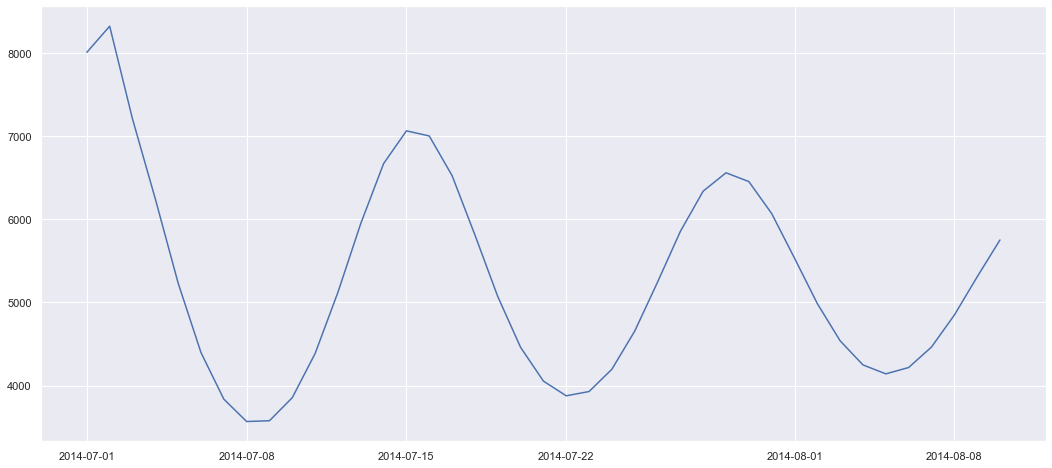

In [112]:
plt.plot(future_df['arima_forecast'][546:], label='Predicted_Sales')
plt.show()

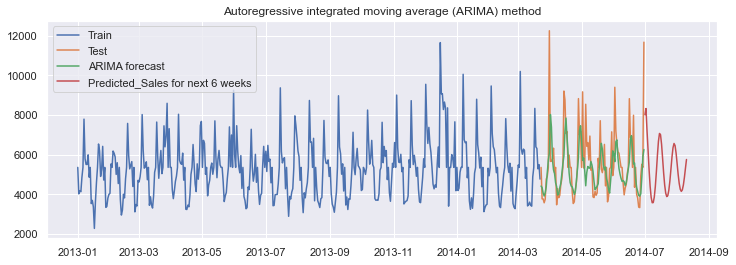

In [114]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(new_df['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.plot(future_df['arima_forecast'][546:], label='Predicted_Sales for next 6 weeks')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [115]:
new_df.columns

Index(['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'promo2', 'sales_log',
       'ar_forecast_Log', 'arima_forecast'],
      dtype='object')

In [143]:
new_df.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,forecast
2013-01-01,46,2,5352.290997,0,0,0,a,1,1,8.585280,8.543252,5132.006597,8.543252
2013-01-02,46,3,4016.000000,582,1,0,0,1,1,8.298042,8.568273,5262.036058,8.568273
2013-01-03,46,4,4177.000000,553,1,0,0,1,1,8.337349,8.425274,4560.893112,8.425274
2013-01-04,46,5,4125.000000,569,1,0,0,1,1,8.324821,8.359377,4270.034057,8.359377
2013-01-05,46,6,4848.000000,651,1,0,0,0,1,8.486322,8.380128,4359.565976,8.380128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4217.521503,8.347003
2014-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4463.894120,8.403777
2014-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4847.485873,8.486215
2014-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5307.303138,8.576839


**Model Evalution**


In [116]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, new_df['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test-new_df['arima_forecast'][test.index.min():])/test)*100,2)
Results = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
Results

,Method,RMSE,MAPE
0,ARIMA,1431.82,14.62


**VAR model**

In [117]:
#Load the dataset
new_df.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast
date,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,0,0,0,a,1,1,8.585280,8.543252,5132.006597
2013-01-02,46,3,4016.000000,582,1,0,0,1,1,8.298042,8.568273,5262.036058
2013-01-03,46,4,4177.000000,553,1,0,0,1,1,8.337349,8.425274,4560.893112
2013-01-04,46,5,4125.000000,569,1,0,0,1,1,8.324821,8.359377,4270.034057
2013-01-05,46,6,4848.000000,651,1,0,0,0,1,8.486322,8.380128,4359.565976


**Split the dataset to training & testing**

In [118]:
#split the dataset
nobs = 100
train, test = new_df[0:-nobs], new_df[-nobs:]

# Check size
print(train.shape)
print(test.shape)  

(446, 12)
(100, 12)


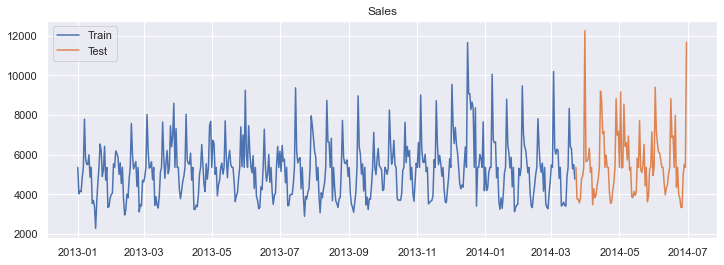

In [119]:
plt.figure(figsize=(12,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.legend(loc='best')
plt.title('Sales')
plt.show()

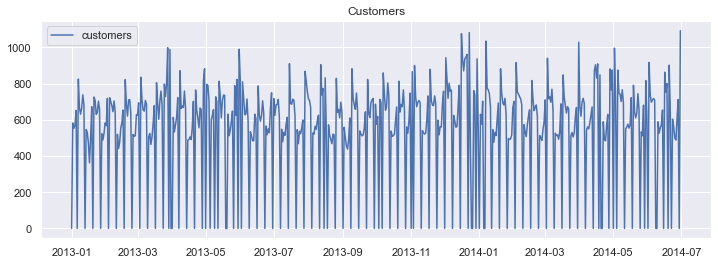

In [120]:
#plot the arima forecasting & Original series
plt.figure(figsize=(12,4))
plt.plot(new_df['customers'],label='customers')
plt.legend(loc='best')
plt.title('Customers')
plt.show()

In [121]:
(new_df['customers']==0).sum()

98

In [122]:
#impute the NAN values
new_df['customers']=new_df['customers'].replace(0, np.nan)

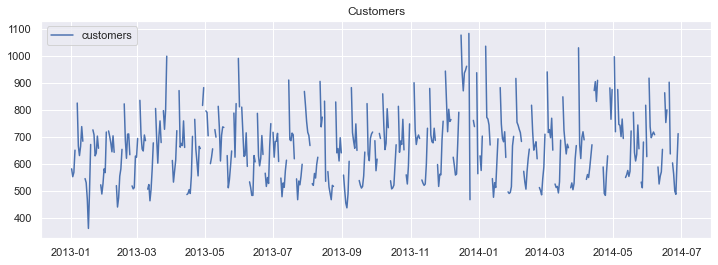

In [123]:
#plot the arima forecasting & Original series
plt.figure(figsize=(12,4))
plt.plot(new_df['customers'],label='customers')
plt.legend(loc='best')
plt.title('Customers')
plt.show()

In [124]:
#KNN imputer for filling NAN values
imputer = KNNImputer(n_neighbors=2)

In [125]:
new_df['customers'] = imputer.fit_transform(np.array(new_df['customers']).reshape(-1, 1))
new_df['customers'].head()

date
2013-01-01    661.848214
2013-01-02    582.000000
2013-01-03    553.000000
2013-01-04    569.000000
2013-01-05    651.000000
Name: customers, dtype: float64

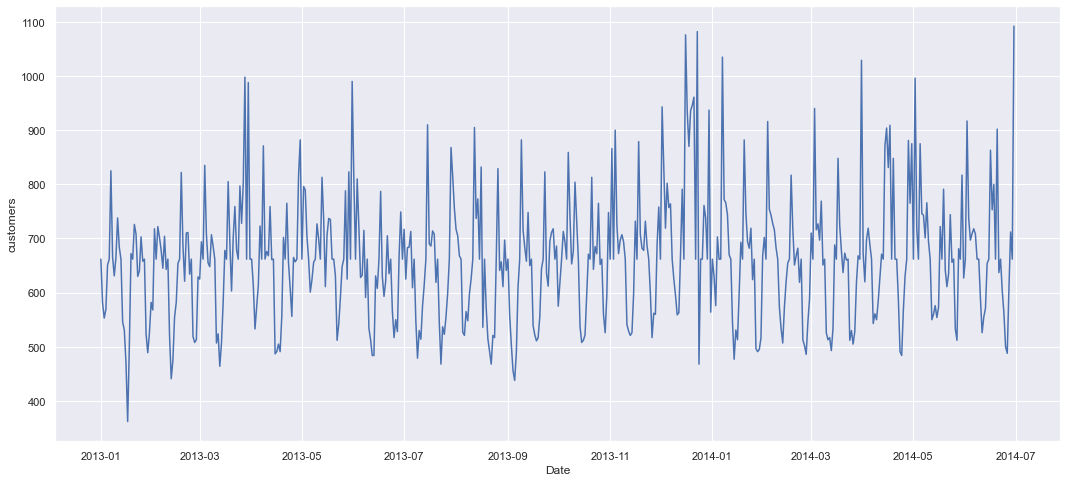

In [126]:
## plot graph
plt.xlabel('Date')
plt.ylabel('customers')
plt.plot(new_df['customers'])
plt.show()

In [127]:
new_df.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast
date,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,661.848214,0,0,a,1,1,8.585280,8.543252,5132.006597
2013-01-02,46,3,4016.000000,582.000000,1,0,0,1,1,8.298042,8.568273,5262.036058
2013-01-03,46,4,4177.000000,553.000000,1,0,0,1,1,8.337349,8.425274,4560.893112
2013-01-04,46,5,4125.000000,569.000000,1,0,0,1,1,8.324821,8.359377,4270.034057
2013-01-05,46,6,4848.000000,651.000000,1,0,0,0,1,8.486322,8.380128,4359.565976


**ADF test**

In [128]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(new_df['customers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

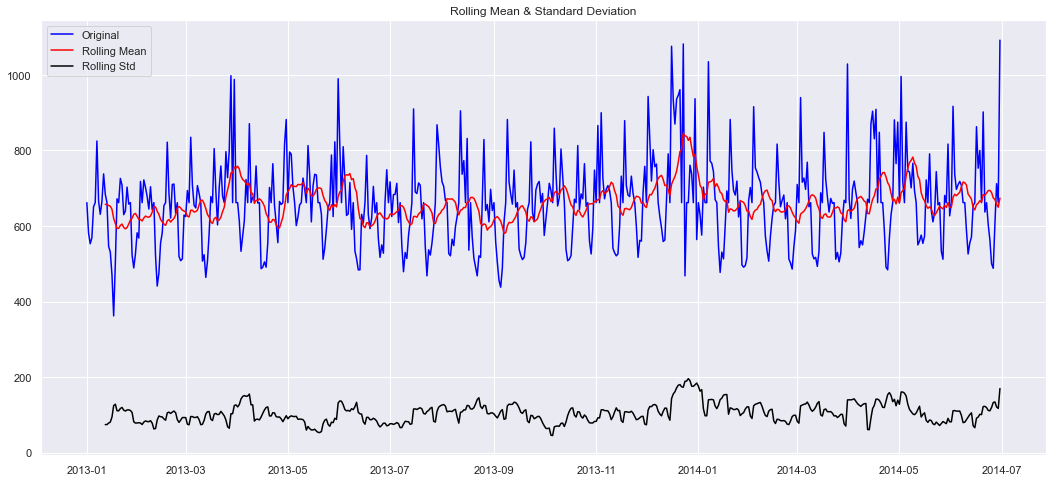

Results of Dickey Fuller Test:
Test Statistic                  -4.678127
p-value                          0.000092
#Lags Used                      15.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


In [129]:
test_stationarity(new_df['customers'])

- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

**The p-value is less than 0.05 so The series is stationary**

In [130]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(new_df['customers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.338694
Critical Values @ 0.05: 0.46
p-value: 0.100000


- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

**The p-value is greater than 0.05 so The series is stationary**

**Log transformation has made mean & variance constant**

In [131]:
#Log Transformation
new_df['customers_log'] = np.log(new_df['customers'])
new_df.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,customers_log
date,,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,661.848214,0,0,a,1,1,8.585280,8.543252,5132.006597,6.495036
2013-01-02,46,3,4016.000000,582.000000,1,0,0,1,1,8.298042,8.568273,5262.036058,6.366470
2013-01-03,46,4,4177.000000,553.000000,1,0,0,1,1,8.337349,8.425274,4560.893112,6.315358
2013-01-04,46,5,4125.000000,569.000000,1,0,0,1,1,8.324821,8.359377,4270.034057,6.343880
2013-01-05,46,6,4848.000000,651.000000,1,0,0,0,1,8.486322,8.380128,4359.565976,6.478510


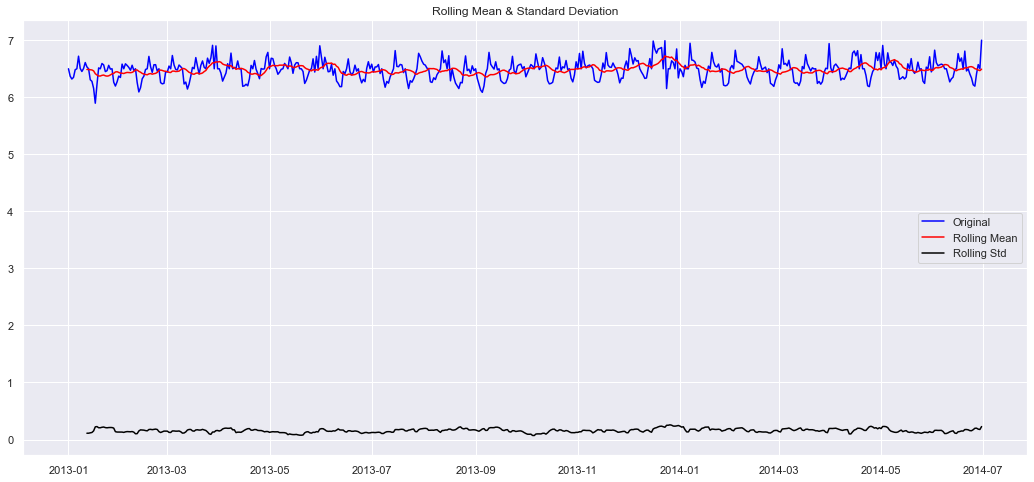

Results of Dickey Fuller Test:
Test Statistic                  -4.678127
p-value                          0.000092
#Lags Used                      15.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


In [132]:
test_stationarity(new_df['customers_log'])

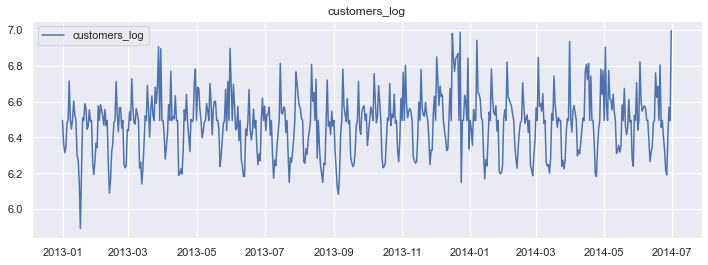

In [133]:
#plot the arima Log series
plt.figure(figsize=(12,4))
plt.plot(new_df['customers_log'],label='customers_log')
plt.legend(loc='best')
plt.title('customers_log')
plt.show()

In [134]:
#Let's check the info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 546 entries, 2013-01-01 to 2014-06-30
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store            546 non-null    int64  
 1   day_of_week      546 non-null    int64  
 2   sales            546 non-null    float64
 3   customers        546 non-null    float64
 4   open             546 non-null    int64  
 5   promo            546 non-null    int64  
 6   state_holiday    546 non-null    object 
 7   school_holiday   546 non-null    int64  
 8   promo2           546 non-null    int64  
 9   sales_log        546 non-null    float64
 10  ar_forecast_Log  546 non-null    float64
 11  arima_forecast   546 non-null    float64
 12  customers_log    546 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 79.7+ KB


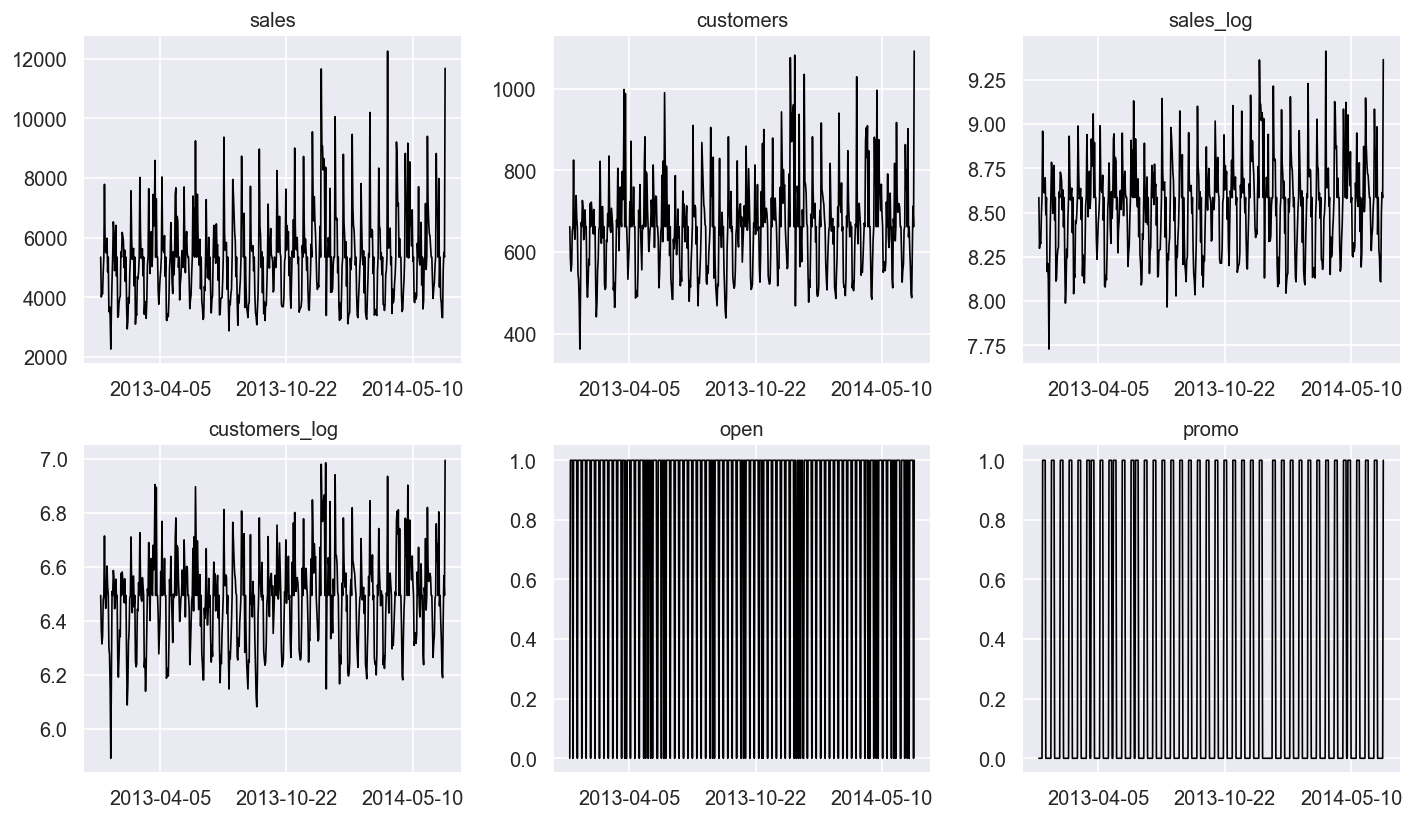

In [135]:
# Plot
ls=['sales','customers','sales_log','customers_log','open','promo','state_holiday','promo2','school_holiday']
df=new_df[ls]
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(12,7))
for i, ax in enumerate(axes.flatten()):
        ax.plot(df[df.columns[i]], color='black', linewidth=1)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=12)

plt.tight_layout();

In [136]:
new_df.columns

Index(['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'promo2', 'sales_log',
       'ar_forecast_Log', 'arima_forecast', 'customers_log'],
      dtype='object')

In [137]:
new_df1=new_df[['sales_log', 'customers_log']]
new_df1

,sales_log,customers_log
date,,
2013-01-01,8.585280,6.495036
2013-01-02,8.298042,6.366470
2013-01-03,8.337349,6.315358
2013-01-04,8.324821,6.343880
2013-01-05,8.486322,6.478510
...,...,...
2014-06-26,8.108623,6.190315
2014-06-27,8.500657,6.406880
2014-06-28,8.614138,6.568078


In [138]:
#Let's create a model
model = VAR(new_df1)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -9.244445314777083
BIC :  -9.197097214285376
FPE :  9.664702901748683e-05
HQIC:  -9.225935053751078 

Lag Order = 2
AIC :  -9.281741553708391
BIC :  -9.202716751376482
FPE :  9.310892455537175e-05
HQIC:  -9.250845126014504 

Lag Order = 3
AIC :  -9.35363823157594
BIC :  -9.242847199386116
FPE :  8.664984117120851e-05
HQIC:  -9.310318637985123 

Lag Order = 4
AIC :  -9.448759749739041
BIC :  -9.306112539359127
FPE :  7.878770162956451e-05
HQIC:  -9.392979813921203 

Lag Order = 5
AIC :  -9.58446659441288
BIC :  -9.409872834459788
FPE :  6.878977909597517e-05
HQIC:  -9.516188961776459 



In [139]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,-8.817,-8.801,0.0001482,-8.810
1,-9.237,-9.189,9.736e-05,-9.218
2,-9.274,-9.195,9.381e-05,-9.243
3,-9.349,-9.238,8.709e-05,-9.305
4,-9.447,-9.304,7.893e-05,-9.391
5,-9.584*,-9.410*,6.879e-05*,-9.516*


In [140]:
#Let's fit the model
model_fitted = model.fit()
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Jan, 2022
Time:                     23:50:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.19710
Nobs:                     545.000    HQIC:                  -9.22594
Log likelihood:           978.468    FPE:                9.66470e-05
AIC:                     -9.24445    Det(Omega_mle):     9.55917e-05
--------------------------------------------------------------------
Results for equation sales_log
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    3.689080         0.391284            9.428           0.000
L1.sales_log             0.679197         0.126965            5.349           0.000
L1.customers_log        -0.146301         0.

In [141]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

1


In [145]:
# Input data for forecasting
forecast_input = new_df1.values[-lag_order:]
forecast_input

array([[9.36503376, 6.99576616]])

In [148]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=100)
df_forecast = pd.DataFrame(fc, index=future_df.index[-100:], columns=new_df1.columns + '_2d')
df_forecast

,sales_log_2d,customers_log_2d
2014-05-03,9.026298,6.782316
2014-05-04,8.827457,6.658519
2014-05-05,8.710517,6.585902
2014-05-06,8.641716,6.543201
2014-05-07,8.601233,6.518079
...,...,...
2014-08-06,8.543359,6.482165
2014-08-07,8.543359,6.482165
2014-08-08,8.543359,6.482165
2014-08-09,8.543359,6.482165


In [149]:
df_forecast['VAR_forecast_Sales'] = np.exp(df_forecast['sales_log_2d'])
df_forecast['VAR_forecast_customers'] = np.exp(df_forecast['customers_log_2d'])
df_forecast

,sales_log_2d,customers_log_2d,VAR_forecast_Sales,VAR_forecast_customers
2014-05-03,9.026298,6.782316,8319.005180,882.109428
2014-05-04,8.827457,6.658519,6818.927404,779.396081
2014-05-05,8.710517,6.585902,6066.378781,724.804180
2014-05-06,8.641716,6.543201,5663.037178,694.505898
2014-05-07,8.601233,6.518079,5438.361058,677.275777
...,...,...,...,...
2014-08-06,8.543359,6.482165,5132.556238,653.384005
2014-08-07,8.543359,6.482165,5132.556238,653.384005
2014-08-08,8.543359,6.482165,5132.556238,653.384005
2014-08-09,8.543359,6.482165,5132.556238,653.384005


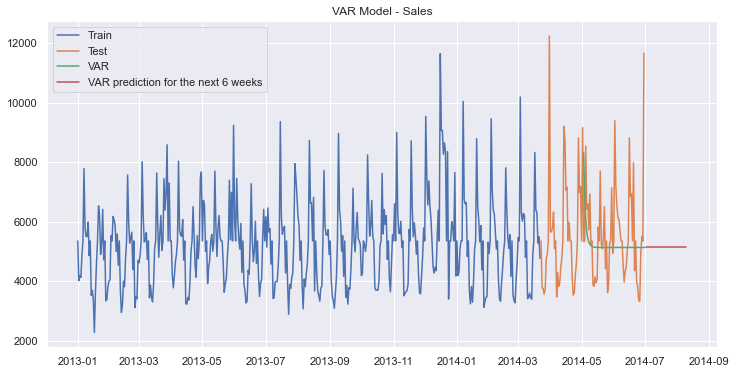

In [156]:
plt.figure(figsize=(12,6)) 
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(df_forecast['VAR_forecast_Sales'][:60], label='VAR')
plt.plot(df_forecast['VAR_forecast_Sales'][60:], label='VAR prediction for the next 6 weeks')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

In [157]:
train_len = 446
train1 = new_df[0:train_len] # first 890days as training set
test1 = new_df[train_len:] # last 42 days as out-of-time test set

In [158]:
train1.head()

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,customers_log
date,,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,661.848214,0,0,a,1,1,8.585280,8.543252,5132.006597,6.495036
2013-01-02,46,3,4016.000000,582.000000,1,0,0,1,1,8.298042,8.568273,5262.036058,6.366470
2013-01-03,46,4,4177.000000,553.000000,1,0,0,1,1,8.337349,8.425274,4560.893112,6.315358
2013-01-04,46,5,4125.000000,569.000000,1,0,0,1,1,8.324821,8.359377,4270.034057,6.343880
2013-01-05,46,6,4848.000000,651.000000,1,0,0,0,1,8.486322,8.380128,4359.565976,6.478510


**Model Evalution**

In [160]:
# Let's calculate the rmse and MAPE
rmse = np.sqrt(mean_squared_error(test1['sales'], df_forecast['VAR_forecast_Sales'])).round(2)
mape = np.round(np.mean(np.abs(test1['sales']-df_forecast['VAR_forecast_Sales'])/test1['sales'])*100,2)
tempResults = pd.DataFrame({'Method':['VAR'], 'RMSE': [rmse],'MAPE': [mape] })

In [161]:
tempResults

,Method,RMSE,MAPE
0,VAR,1812.73,19.78


In [162]:
results = pd.concat([Results , tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ARIMA,1431.82,14.62
0,VAR,1812.73,19.78


**Johansen-Impulse**


In [163]:
joh_model1 = coint_johansen(new_df[['sales','customers']],-1,1)

In [164]:
joh_model1

In [165]:
joh_model1.lr1

array([112.42478612,   0.72064466])

In [166]:
joh_model1.lr2

array([111.70414146,   0.72064466])

In [167]:
new_df[['sales','customers']].shape

(546, 2)

In [168]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [169]:
joh_output(joh_model1)

   max_eig_stat  trace_stat
0    111.704141  112.424786
1      0.720645    0.720645 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



In [170]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

In [171]:
rank=select_coint_rank(new_df[['sales','customers']],-1,1)
print(rank.rank)

1


**Rank is one**

In [172]:
from statsmodels.tsa.stattools import coint

In [173]:
coint(new_df['sales'],new_df['customers'])#null hypothesis-There is not coint

(-5.2899007251031565,
 4.6611524040865076e-05,
 array([-3.91664811, -3.34736416, -3.05224118]))

4.6611524040865076e-05>.05

We can't reject the null hypothesis

**Sales and customers aren't cointegration to each other**

**VARMAX MODEL**

In [174]:
#create dymmy variables
new_df=pd.get_dummies(new_df)
new_df.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,customers_log,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
date,,,,,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,661.848214,0,0,1,1,8.585280,8.543252,5132.006597,6.495036,0,1,0,0
2013-01-02,46,3,4016.000000,582.000000,1,0,1,1,8.298042,8.568273,5262.036058,6.366470,1,0,0,0
2013-01-03,46,4,4177.000000,553.000000,1,0,1,1,8.337349,8.425274,4560.893112,6.315358,1,0,0,0
2013-01-04,46,5,4125.000000,569.000000,1,0,1,1,8.324821,8.359377,4270.034057,6.343880,1,0,0,0
2013-01-05,46,6,4848.000000,651.000000,1,0,0,1,8.486322,8.380128,4359.565976,6.478510,1,0,0,0


In [175]:
new_df.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,customers_log,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
date,,,,,,,,,,,,,,,,
2013-01-01,46,2,5352.290997,661.848214,0,0,1,1,8.585280,8.543252,5132.006597,6.495036,0,1,0,0
2013-01-02,46,3,4016.000000,582.000000,1,0,1,1,8.298042,8.568273,5262.036058,6.366470,1,0,0,0
2013-01-03,46,4,4177.000000,553.000000,1,0,1,1,8.337349,8.425274,4560.893112,6.315358,1,0,0,0
2013-01-04,46,5,4125.000000,569.000000,1,0,1,1,8.324821,8.359377,4270.034057,6.343880,1,0,0,0
2013-01-05,46,6,4848.000000,651.000000,1,0,0,1,8.486322,8.380128,4359.565976,6.478510,1,0,0,0


In [236]:
from pandas.tseries.offsets import DateOffset
future_dates3=[new_df.index[-1]+ DateOffset(days=x)for x in range(0,42)]
future_datest_df1=pd.DataFrame(index=future_dates3[1:],columns=new_df.columns)

future_df=pd.concat([new_df,future_datest_df1])

In [269]:
#Let's fill random values for future forecasting
future_df['open'][546:]=future_df['open'][505:546]
future_df['promo'][546:]=future_df['promo'][505:546]
future_df['school_holiday'][546:]=future_df['school_holiday'][505:546]
future_df['promo2'][546:]=future_df['promo2'][505:546]
future_df['state_holiday_0'][546:]=future_df['state_holiday_0'][505:546]
future_df['state_holiday_a'][546:]=future_df['state_holiday_a'][505:546]
future_df['state_holiday_b'][546:]=future_df['state_holiday_b'][505:546]
future_df['state_holiday_c'][546:]=future_df['state_holiday_c'][505:546]

In [271]:
future_df.tail()

,store,day_of_week,sales,customers,open,promo,school_holiday,promo2,sales_log,ar_forecast_Log,arima_forecast,customers_log,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
2014-08-06,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,1,0,0,0
2014-08-07,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,1,0,0,0
2014-08-08,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,1,0,0,0
2014-08-09,NaN,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,1,0,0,0
2014-08-10,NaN,NaN,NaN,NaN,1,1,0,1,NaN,NaN,NaN,NaN,1,0,0,0


In [282]:
exog = new_df[['open','promo','school_holiday','promo2','state_holiday_0','state_holiday_a','state_holiday_b','state_holiday_c']]
mod = sm.tsa.VARMAX(new_df[['sales_log', 'customers_log']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:     ['sales_log', 'customers_log']   No. Observations:                  546
Model:                                VARMAX(1,1)   Log Likelihood                1205.345
Date:                            Sun, 16 Jan 2022   AIC                          -2356.691
Time:                                    01:11:15   BIC                          -2240.520
Sample:                                01-01-2013   HQIC                         -2311.279
                                     - 06-30-2014                                         
Covariance Type:                              opg                                         
Ljung-Box (L1) (Q):             1.01, 0.74   Jarque-Bera (JB):         84.30, 22.02
Prob(Q):                        0.31, 0.39   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.24, 1.14   Skew:                       0.70, 0.35
Prob(H) (two-sided):

In [307]:
train_len = 505
train = new_df[0:train_len] # first 446 days as training set
test = new_df[train_len:] 

start_index = test.index.min()
end_index = test.index.max()

In [308]:
print(start_index)
print(end_index)

2014-05-21 00:00:00
2014-06-30 00:00:00


In [309]:
print(test.shape)
print(train.shape)

(41, 16)
(505, 16)


In [286]:
print(future_df.index.min())
print(future_df.index.max())

2013-01-01 00:00:00
2014-08-10 00:00:00


In [310]:
predictions1 = mod.fit().predict(future_df.index.min(),future_df.index.max(),exog=test[['open','promo','school_holiday','promo2','state_holiday_0','state_holiday_a','state_holiday_b','state_holiday_c']])

In [314]:


predictions1['VARMAX_forecast_Sales'] = np.exp(predictions1['sales_log'])
predictions1['VARMAX_forecast_customers'] = np.exp(predictions1['customers_log'])
predictions1                                                  

,sales_log,customers_log,VARMAX_forecast_Sales,VARMAX_forecast_customers
2013-01-01,8.326232,6.341371,4130.822379,567.574105
2013-01-02,8.401816,6.392957,4455.151239,597.621152
2013-01-03,8.327116,6.346487,4134.474759,570.485287
2013-01-04,8.318156,6.334274,4097.597777,563.560082
2013-01-05,8.324619,6.362366,4124.165137,579.616279
...,...,...,...,...
2014-08-06,8.335424,6.370544,4168.969618,584.375512
2014-08-07,8.334678,6.369946,4165.857861,584.026320
2014-08-08,8.334450,6.369764,4164.909176,583.919836
2014-08-09,8.513443,6.442010,4981.286243,627.667054


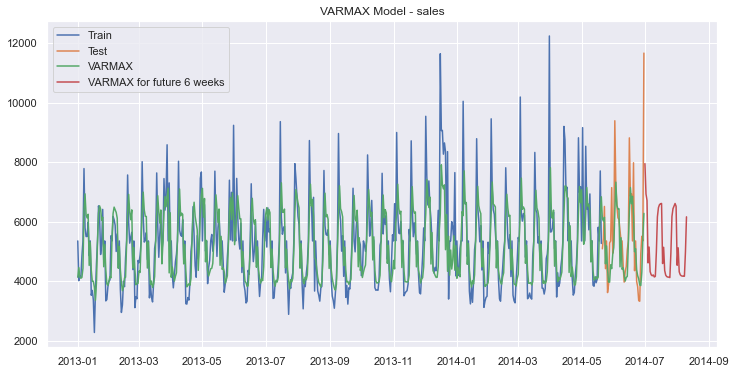

In [318]:
plt.figure(figsize=(12,6)) 
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(predictions1['VARMAX_forecast_Sales'][:546], label='VARMAX')
plt.plot(predictions1['VARMAX_forecast_Sales'][546:], label='VARMAX for future 6 weeks')

plt.legend(loc='best')
plt.title('VARMAX Model - sales')
plt.show()

**Model Evalution**


In [322]:
# Let's calculate the rmse and MAPE
rmse = np.sqrt(mean_squared_error(test['sales'], predictions1['VARMAX_forecast_Sales'][505:546])).round(2)
mape = np.round(np.mean(np.abs(test['sales']-predictions1['VARMAX_forecast_Sales'][505:546])/test['sales'])*100,2)
tempResults = pd.DataFrame({'Method':['VARMAX'], 'RMSE': [rmse],'MAPE': [mape] })

In [323]:
results = pd.concat([results  , tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ARIMA,1431.82,14.62
0,VAR,1812.73,19.78
0,VARMAX,1312.09,13.08


**VARMAX is the best model**

-  Is the sales data non-stationary? If so, how do you find it and correct it?

-  Is the data cointegrated? Which variables are cointegrated and how do you find them?

-  What is the impact of the number of customers on sales?

-  What is the impact of promo and promo2 variables on sales? How do you measure it?

-  Forecast sales for the next 6 weeks?
-  Report the accuracy of the model using MAPE

-   Find outliers at the 99th percentile and remove them.

-   Standardize the sales and number of customers variables before modelling.

-   Determine if the data is stationary

-   If stationary then apply Vector Autoregression Model.

-   If non-stationary then specify the model in differences

-   Make sales, promo2 and any other variables you think of as dependent variables.

-   check for cointegration using the Johansen test. 

-   Predict sales for the next 6 weeks

# Conclusion

-   VARMAX is the best model
-   The data is stationary
-   Sales and Customers are cointegrated to each others
-   Sales will get increase as the number of customer will get increase.
-   promo has positive impact on sales
-   promo2 doesn't have any impact on sales